## Creando nuestro propio KNN

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings 
from math import sqrt
from collections import Counter

In [15]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

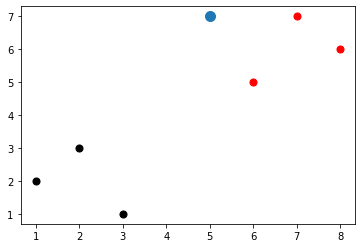

In [16]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [67]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data)>=k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    distances=[]
    for group in data:
       # print(group)
        for feature in data[group]:
            #print(feature)
            # aplicamos distancia euclidea
            d=np.linalg.norm(np.array(feature)-np.array(predict))
           # print(feature, predict, d)
            distances.append([d, group])
    ## obtenemos los k votes mayores
    votes=[i[1] for i in sorted(distances)[:k]]
    ## contamos los votos
    vote_result= Counter(votes).most_common(1)[0][0]##[["r", 2], ["k", 3]]
    return vote_result



In [34]:
result= k_nearest_neighbors(dataset, new_point)
result

k
[1, 2] [5, 7] 6.4031242374328485
[2, 3] [5, 7] 5.0
[3, 1] [5, 7] 6.324555320336759
r
[6, 5] [5, 7] 2.23606797749979
[7, 7] [5, 7] 2.0
[8, 6] [5, 7] 3.1622776601683795


'r'

In [28]:
dataset["k"]

[[1, 2], [2, 3], [3, 1]]

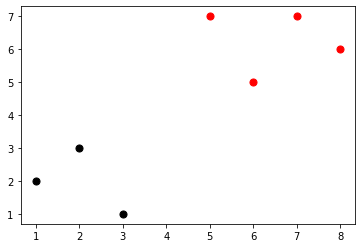

In [37]:
## pintamos ya con los el grupo al que corresponde
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=50, color=result)

## Contrastar con el otro modelo

In [39]:
df=pd.read_csv("archivos/cancer.csv", header=None)
## renombramos las columnas
df.columns=["name", "V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]
df=df.drop(["name"], 1)
df.replace("?", -99999, inplace=True)
full_data=df.astype(float)

In [41]:
full_data=df.astype(float).values
full_data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [42]:
import random

In [43]:
random.shuffle(full_data)

In [44]:
test_size = 0.2

In [45]:
train_set = {2:[],4:[]}
test_set = {2:[], 4:[]}

In [46]:
train_data= full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [48]:
train_data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 6.,  3.,  3., ...,  5.,  3.,  2.],
       [ 4.,  1.,  2., ...,  1.,  1.,  2.],
       [ 8., 10., 10., ...,  9.,  1.,  4.]])

In [ ]:
for i in train_data:
    print(i[-1])

In [55]:
## en la columna -1 se guarda el tipo de clase que es, cuando es 4 se guarda en un array y cuando es 2 se guarda
## en otro diccionario dentro del array
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [70]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        ## le pasamos los datos de entrenamiento por que se supone que los datos del dataset deben ser los mismos
        ## resultados que si el grupo de test fuera suministrado
       
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9640287769784173
